**Digital Signal Processing Lab Experiment 1**
---
Roll no-191EE162 

In [34]:
import numpy as np
import IPython
import scipy
import math
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import matplotlib
import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile
%matplotlib inline

In [35]:

plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 8})

pi = np.pi

Setting up the Value of alpha
$alpha = 1 + x$%$4$ where x is the last 3 digits of the registration number

In [49]:

# Roll no-191EE162
alpha = 1 + 162 % 4  
print(alpha)

3


Problem 1

In [50]:
def create_signal(t,a):
    return np.exp(-t/a)

Text(0.5, 0, '$t$')

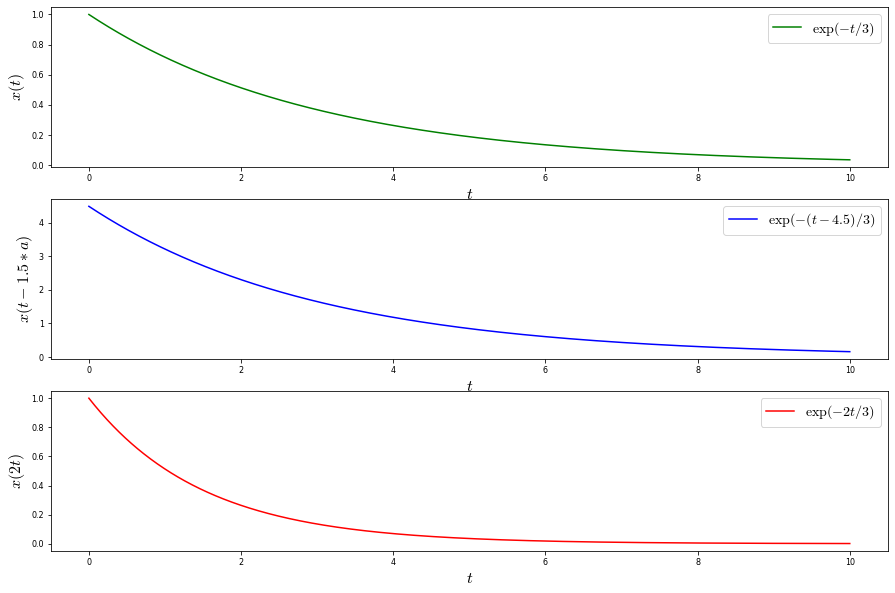

In [51]:
t = np.linspace(0 , 10, num = 1001)

y1 = create_signal(t,alpha)
y2 = create_signal(t - 1.5*alpha,alpha)
y3 = create_signal(2*t,alpha)

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(3,1,1)
plt.plot(t, y1, label = '$\exp{(-t/3)}$', color = "green")
plt.legend(fontsize=14)
ax1.set_ylabel('$x(t)$', fontsize = 16)
ax1.set_xlabel('$t$', fontsize = 16)

ax2 = plt.subplot(3,1,2)
plt.plot(t, y2, label = '$\exp{(-(t - 4.5)/3)}$', color = "blue")
plt.legend(fontsize=14)
ax2.set_ylabel('$x(t - 1.5*a)$', fontsize = 16)
ax2.set_xlabel('$t$', fontsize = 16)

ax3 = plt.subplot(3,1,3)
plt.plot(t, y3, label = '$\exp{(-2t/3)}$', color = "red")
plt.legend(fontsize=14)
ax3.set_ylabel('$x(2t)$', fontsize = 16)
ax3.set_xlabel('$t$', fontsize = 16)

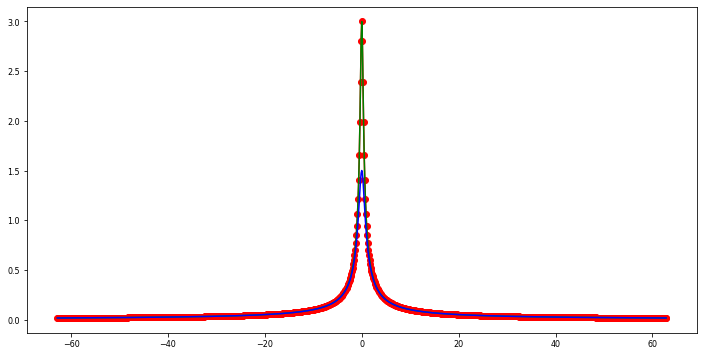

In [52]:
#Doing Fourier Transform of signal

w = 2*pi*np.linspace(-10,10,num = 1001)

Y1 = 1/(1j*w + (1/alpha))
Y2 = (np.exp(-1j*w*(1.5*alpha)))/(1j*w+(1/alpha))               #Y2 = Y1(w)* exp(-jwt0)
Y3 = 0.5 * 1/((1j*w*0.5)+(1/alpha))                             # Y3 = 1/2 * Y1(w/2)

plt.figure()
plt.plot(w, np.abs(Y1), 'r', marker='o')
plt.plot(w, np.abs(Y2), 'g')
plt.plot(w, np.abs(Y3), 'b')

Problem 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


Text(0.5, 1.0, 'Stem plot of y')

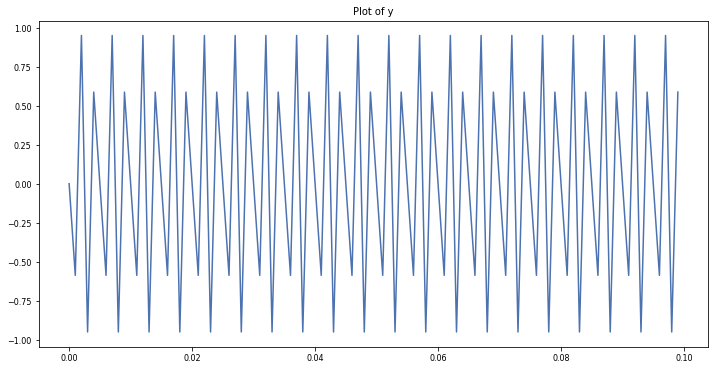

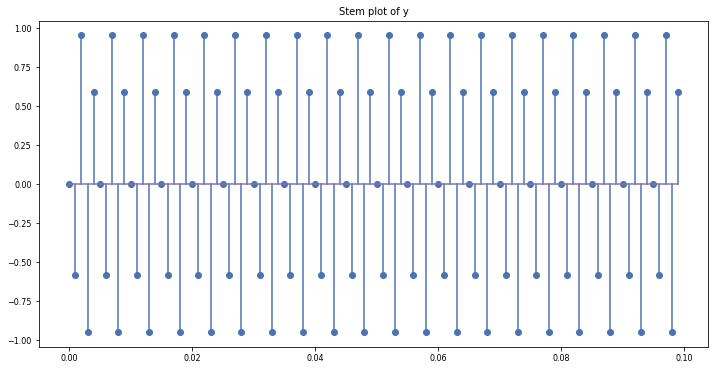

In [53]:
f1 = 200*3
f2 = 220*3
pi = math.pi
t = np.linspace(0,4.999,num = 5000)
y1 = np.sin(2*pi*f1*t)
y2 = np.sin(2*pi*f2*t)
y = np.append(y1,y2,axis = 0)

plt.plot(t[0:100],y[0:100])
plt.title("Plot of y", fontsize=10)

plt.figure()
plt.stem(t[0:100],y[0:100])
plt.title("Stem plot of y", fontsize=10)

Problem 3

Text(0.5, 1.0, 'Data after convolution')

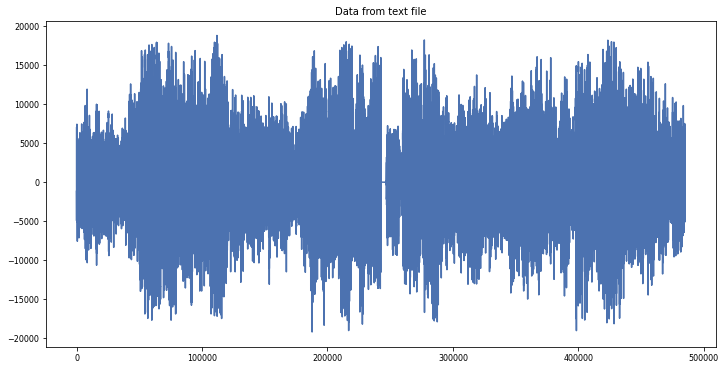

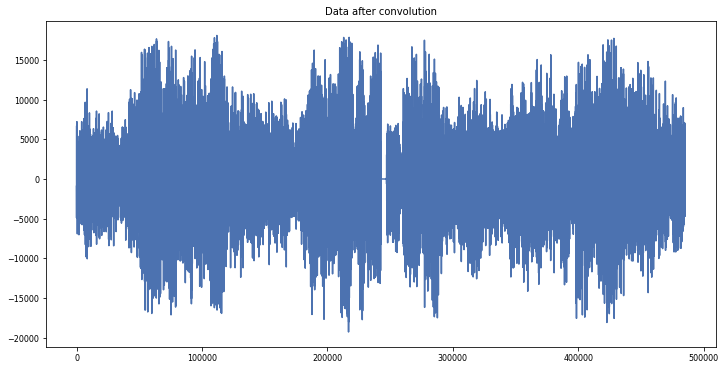

In [54]:
conv_text1 = np.loadtxt('ConvFile1.txt')
Fs, track0 = wavfile.read('Track001.wav')

convolved_signal1 = scipy.signal.convolve(track0,conv_text1)
IPython.display.Audio(convolved_signal1,rate = Fs)

plt.plot(np.fft.fftshift(track0))
plt.title("Data from text file", fontsize=10)
plt.figure()

plt.plot(np.fft.fftshift(convolved_signal1))
plt.title("Data after convolution", fontsize=10)

In [55]:

conv_text = np.loadtxt('ConvFile3.txt')
Fs, track = wavfile.read('Track003.wav')

track1 = []
for i in range(len(track)):
    track1.append(track[i][0])
    
IPython.display.Audio(track1, rate = Fs)

In [56]:
convolved_signal = scipy.signal.convolve(track1,conv_text)
IPython.display.Audio(convolved_signal,rate = Fs)


wavfile.write('Convolved_signal.wav',Fs,convolved_signal)

Problem 4

In [58]:
# Read speech|.wav file
Fs, speech = wavfile.read('speech.wav')
print('Sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(speech, rate=Fs)

Sampling rate: 16000Hz


In [59]:

def multiply_signals(x, f, Fs):
    w = 2*pi*(float(f) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

y = multiply_signals(speech, 500, Fs)
IPython.display.Audio(y, rate=Fs)

Text(0.5, 1.0, '$y(n)$')

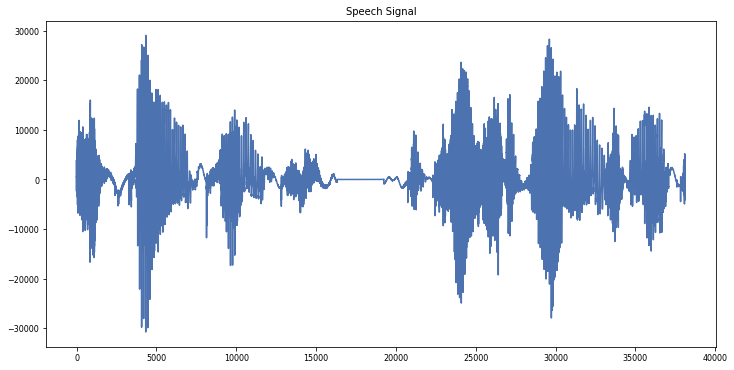

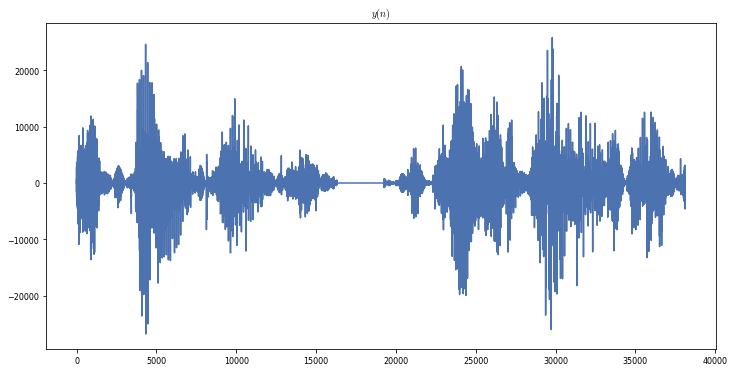

In [60]:
plt.plot(np.fft.fftshift(speech))
plt.title("Speech Signal", fontsize=10)

plt.figure()
plt.plot(np.fft.fftshift(y))
plt.title("$y(n)$", fontsize=10)

In [61]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    return N, X

(array([0.00000000e+00, 4.19661124e-01, 8.39322247e-01, ...,
        7.99874102e+03, 7.99916068e+03, 7.99958034e+03]),
 array([1179833.605536  , 1217214.06005538, 1163872.15602042, ...,
         228608.69469601,   40455.30936305,   60185.82048473]))

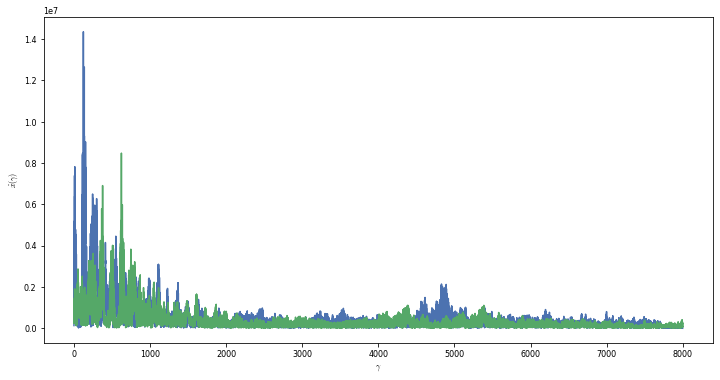

In [62]:
plot_spec(speech, Fs, Fs/2)
plot_spec(y, Fs, Fs/2)